# Ahmed Abd-Elsalam Muhammed Afify

In [204]:
#importing all the libraries which are neede
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

# Step_1:

In [255]:
col_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df = pd.read_csv("auto-mpg.data", header=None, delim_whitespace=True, names=col_names)

# Step_2:

In [256]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [258]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [259]:
df['horsepower'].replace('?', np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [260]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


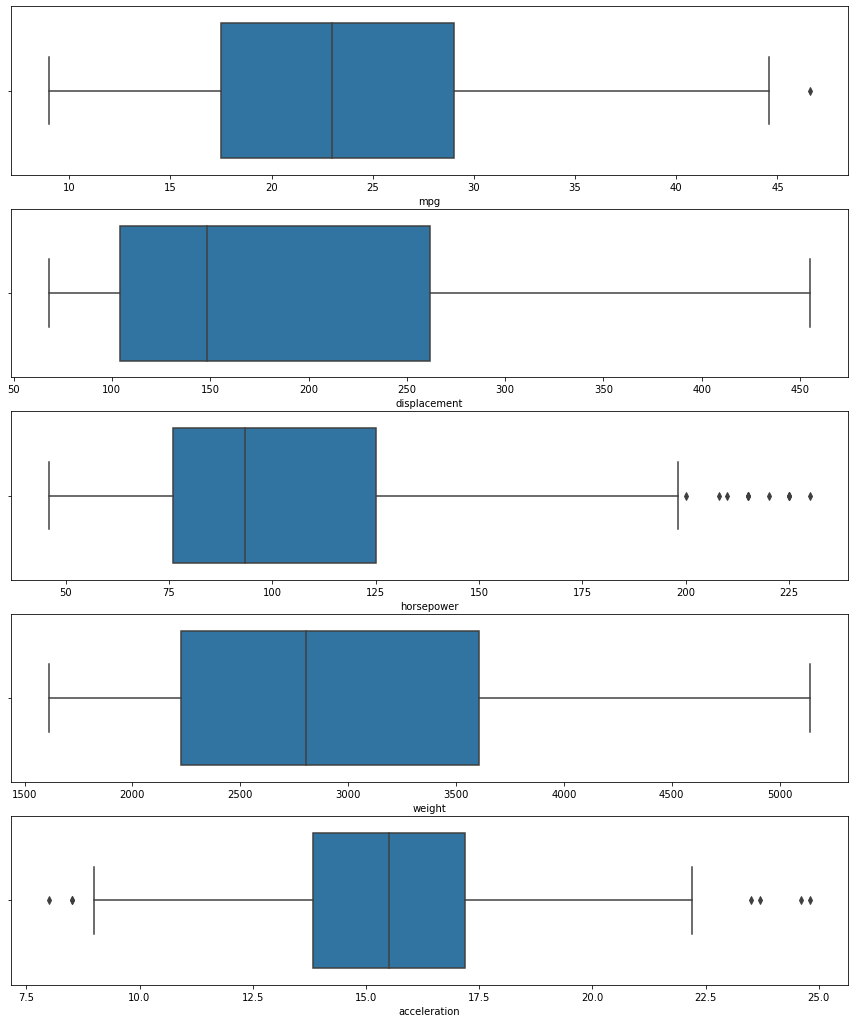

In [261]:
# pd.plotting.boxplot(df, figsize = (10,20))
# plt.show()

#Box Plot for each input variable
features = ['mpg','displacement', 'horsepower', 'weight','acceleration']
f, axes = plt.subplots(len(features), figsize = (15,18))
for i,j in enumerate(features):
    sns.boxplot(x=j,data=df, ax=axes[i])

In [262]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

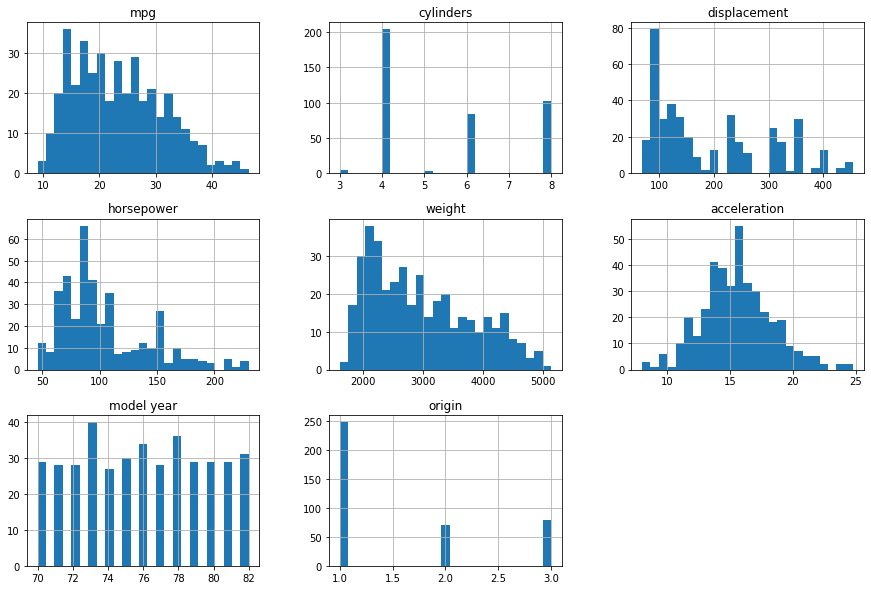

In [263]:
df.hist(figsize=(15,10),bins=25)
plt.show()

# Step_3:

In [264]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

mpg               11.50
cylinders          4.00
displacement     157.75
horsepower        49.00
weight          1384.25
acceleration       3.35
model year         6.00
origin             1.00
dtype: float64

In [265]:
print("Old Shape: ", df.shape) 
  
upper = np.where(df.iloc[:,:5] >= (Q3+1.5*IQR))
lower = np.where(df.iloc[:,:5] <= (Q1-1.5*IQR))

drops = set(upper[0])
drops.update(lower[0])
drops = list(drops)

df.drop(drops, inplace = True)
  
print("New Shape: ", df.shape)

Old Shape:  (398, 9)
New Shape:  (386, 9)


<ipython-input-265-eb55719f13cd>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper = np.where(df.iloc[:,:5] >= (Q3+1.5*IQR))
<ipython-input-265-eb55719f13cd>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower = np.where(df.iloc[:,:5] <= (Q1-1.5*IQR))


In [266]:
#drop duplicate data instances if any
print(f'before: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'After: {df.shape}')

before: (386, 9)
After: (386, 9)


In [267]:
df.iloc[:,:5].corr()

,mpg,cylinders,displacement,horsepower,weight
mpg,1.000000,-0.765059,-0.801739,-0.783433,-0.826527
cylinders,-0.765059,1.000000,0.955477,0.853279,0.892149
displacement,-0.801739,0.955477,1.000000,0.889599,0.937079
horsepower,-0.783433,0.853279,0.889599,1.000000,0.873556
weight,-0.826527,0.892149,0.937079,0.873556,1.000000


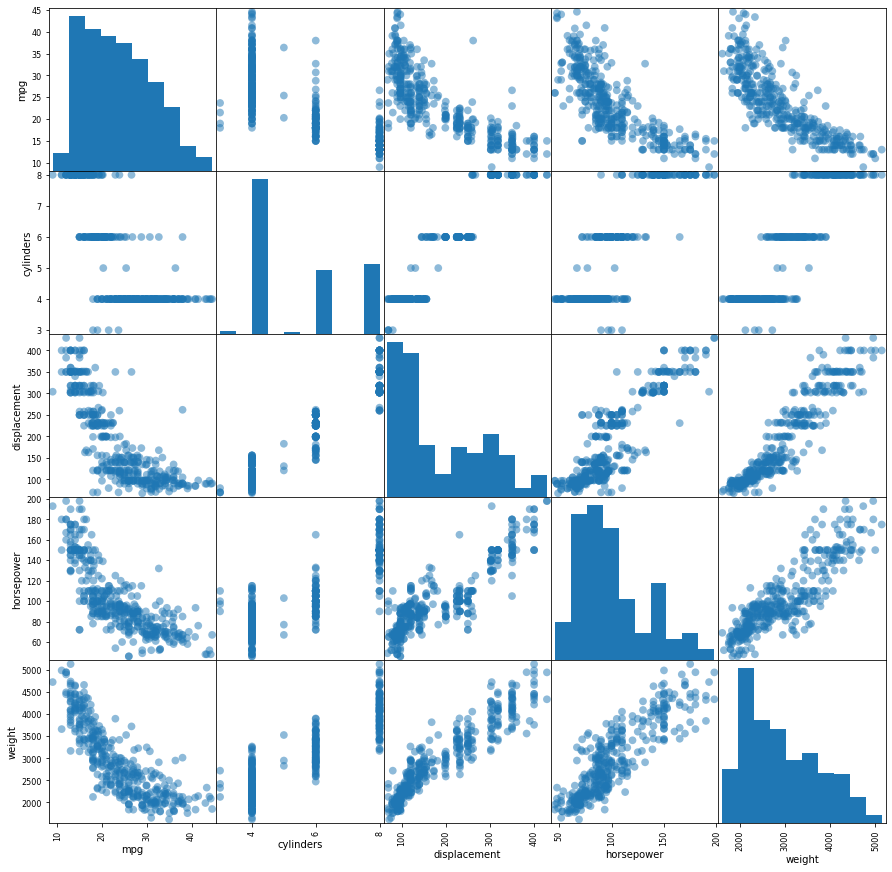

In [268]:
pd.plotting.scatter_matrix(df.iloc[:,:5], figsize=(15,15), s=60, marker='o')
plt.show()

# Steps 4,5,6:

## Training the model and getting insights:

### MPG Vs HorsePower:

In [243]:
y = df['mpg'].to_numpy().reshape(-1, 1)
x = df['horsepower'].to_numpy().reshape(-1, 1)
model = LinearRegression()

In [244]:
splits = [0.1, 0.2, 0.3, 0.4, 0.5]
train_score = []
test_score = []
for i in splits:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i,random_state=0)
    model.fit(x_train,y_train)

    r2_train = model.score(x_train,y_train)
    r2_test = model.score(x_test,y_test)
    
    train_score.append(r2_train)
    test_score.append(r2_test)
    
    print(f'Test_Size= ({i}):')
    print(f'R2_Train= {r2_train}')
    print(f'R2_Test= {r2_test}\n')

print('_______________________ Averages _______________________')
print(f'Avg. R2_Traing= {sum(train_score)/len(train_score)}')
print(f'Avg. R2_Test= {sum(test_score)/len(test_score)}')

Test_Size= (0.1):
R2_Train= 0.62833559284385
R2_Test= 0.40943134330806963

Test_Size= (0.2):
R2_Train= 0.6285761151951428
R2_Test= 0.5452759908009728

Test_Size= (0.3):
R2_Train= 0.6316700685218468
R2_Test= 0.5531402601335895

Test_Size= (0.4):
R2_Train= 0.6042538293061854
R2_Test= 0.6248064154271606

Test_Size= (0.5):
R2_Train= 0.6098716784271956
R2_Test= 0.6163259006910771

_______________________ Averages _______________________
Avg. R2_Traing= 0.6205414568588441
Avg. R2_Test= 0.549795982072174


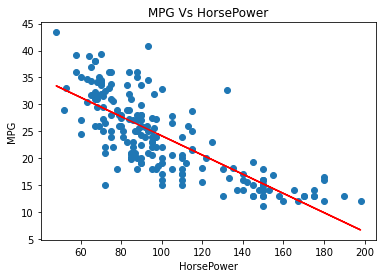

In [246]:
# Plotting:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='r')
plt.title("MPG Vs HorsePower") 
plt.ylabel("MPG")
plt.xlabel("HorsePower")
plt.show()

___
### MPG Vs Dispalcement:

In [247]:
y = df['mpg'].to_numpy().reshape(-1, 1)
x = df['displacement'].to_numpy().reshape(-1, 1)
model = LinearRegression()

In [248]:
splits = [0.1, 0.2, 0.3, 0.4, 0.5]
train_score = []
test_score = []
for i in splits:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i,random_state=0)
    model.fit(x_train,y_train)

    r2_train = model.score(x_train,y_train)
    r2_test = model.score(x_test,y_test)
    
    train_score.append(r2_train)
    test_score.append(r2_test)
    
    print(f'Test_Size= ({i}):')
    print(f'R2_Train= {r2_train}')
    print(f'R2_Test= {r2_test}\n')

print('_______________________ Averages _______________________')
print(f'Avg. R2_Traing= {sum(train_score)/len(train_score)}')
print(f'Avg. R2_Test= {sum(test_score)/len(test_score)}')

Test_Size= (0.1):
R2_Train= 0.6502593322161692
R2_Test= 0.528761059212216

Test_Size= (0.2):
R2_Train= 0.6446319456822592
R2_Test= 0.6321242794098517

Test_Size= (0.3):
R2_Train= 0.6499003242123631
R2_Test= 0.6141640143439958

Test_Size= (0.4):
R2_Train= 0.6623519361579947
R2_Test= 0.6159795619532422

Test_Size= (0.5):
R2_Train= 0.7008832217069861
R2_Test= 0.5838190201452473

_______________________ Averages _______________________
Avg. R2_Traing= 0.6616053519951545
Avg. R2_Test= 0.5949695870129107


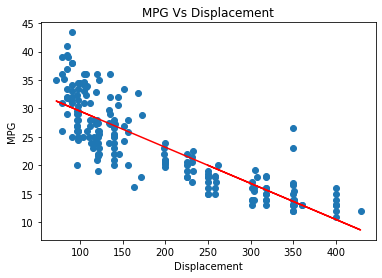

In [250]:
# Plotting:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='r')
plt.title("MPG Vs Displacement") 
plt.ylabel("MPG")
plt.xlabel("Displacement")
plt.show()

___
### MPG Vs Weight:

In [251]:
y = df['mpg'].to_numpy().reshape(-1, 1)
x = df['weight'].to_numpy().reshape(-1, 1)

In [252]:
splits = [0.1, 0.2, 0.3, 0.4, 0.5]
train_score = []
test_score = []
for i in splits:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i,random_state=0)
    model.fit(x_train,y_train)

    r2_train = model.score(x_train,y_train)
    r2_test = model.score(x_test,y_test)
    
    train_score.append(r2_train)
    test_score.append(r2_test)
    
    print(f'Test_Size= ({i}):')
    print(f'R2_Train= {r2_train}')
    print(f'R2_Test= {r2_test}\n')

print('_______________________ Averages _______________________')
print(f'Avg. R2_Traing= {sum(train_score)/len(train_score)}')
print(f'Avg. R2_Test= {sum(test_score)/len(test_score)}')

Test_Size= (0.1):
R2_Train= 0.6942907559923963
R2_Test= 0.5287949059014097

Test_Size= (0.2):
R2_Train= 0.6952705760110951
R2_Test= 0.6289976696859789

Test_Size= (0.3):
R2_Train= 0.6909044393755078
R2_Test= 0.6550217496328605

Test_Size= (0.4):
R2_Train= 0.7102604336654521
R2_Test= 0.6461886108334061

Test_Size= (0.5):
R2_Train= 0.7334205172884094
R2_Test= 0.6333281361415615

_______________________ Averages _______________________
Avg. R2_Traing= 0.7048293444665721
Avg. R2_Test= 0.6184662144390434


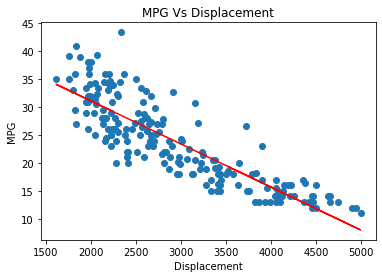

In [253]:
# Plotting:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='r')
plt.title("MPG Vs Displacement") 
plt.ylabel("MPG")
plt.xlabel("Displacement")
plt.show()

___
# Step_7:

**Insights from Step_3 after data preparation and seeing correlations between independent variables**
1) Test Sets gave us an expected value of R2 as the correlation between these variables shows how strongly they are affected by each other.

2) the outliers of the horsepower variable would affect our model so far, as an action we dropped all outliers in the dataset

___
# Step_8:

In [314]:
def Linear_GD(x, y, alpha=0.1, epoches=1000):
    # initialize the parameters:
    m = x.shape[0]
    Xs = np.concatenate((np.ones((m,1)), x), axis=1)
    thetas = np.ones((Xs.shape[1],1))
    yhat = np.zeros((m,1))

    # Implementing Iterations:
    for i in range(epoches):
        yhat = Xs@ thetas
        error = yhat - y
        J_loss = (1/(2*m)) * np.sum(error**2)
        grd = (1/m) * (Xs.T @ error).reshape(-1,1)
        thetas = thetas - alpha*grd

            
    return thetas, yhat

### MPG Vs HorsePower:

In [332]:
y = df['mpg'].to_numpy().reshape(-1, 1)
x = df['horsepower'].to_numpy().reshape(-1, 1)

x= (x-x.mean()) / x.std()
y= (y-y.mean()) / y.std()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [333]:
thetas, yhat = Linear_GD(x_train, y_train, 0.01, 1000)

In [334]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [0.02374415]
theta_1 = [-0.81095463]


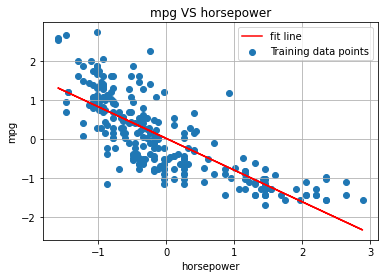

In [335]:
# Plotting the best fit regression lines versus data points:
plt.scatter(x_train, y_train, label='Training data points')
plt.plot(x_train,yhat, label='fit line', color='r')

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('mpg VS horsepower')
plt.legend()
plt.grid()
plt.show()

In [336]:
# Calculating goodness of fit of the line:
ybar = np.mean(y_train)
SStot = np.sum((y_train-ybar)**2)
SSres = np.sum((y_train-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.6235218662222837


___
### MPG Vs Dispalcement:

In [322]:
y = df['mpg'].to_numpy().reshape(-1, 1)
x = df['displacement'].to_numpy().reshape(-1, 1)

x= (x-x.mean()) / x.std()
y= (y-y.mean()) / y.std()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [323]:
thetas, yhat = Linear_GD(x_train, y_train, 0.01, 1000)

In [324]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [0.0332433]
theta_1 = [-0.82067999]


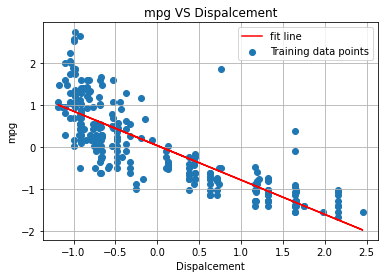

In [325]:
# Plotting the best fit regression lines versus data points:
plt.scatter(x_train, y_train, label='Training data points')
plt.plot(x_train,yhat, label='fit line', color='r')

plt.xlabel('Dispalcement')
plt.ylabel('mpg')
plt.title('mpg VS Dispalcement')
plt.legend()
plt.grid()
plt.show()

In [326]:
# Calculating goodness of fit of the line:
ybar = np.mean(y_train)
SStot = np.sum((y_train-ybar)**2)
SSres = np.sum((y_train-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.6591975809351782


___
### MPG Vs Weight:

In [327]:
y = df['mpg'].to_numpy().reshape(-1, 1)
x = df['weight'].to_numpy().reshape(-1, 1)

x= (x-x.mean()) / x.std()
y= (y-y.mean()) / y.std()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [328]:
thetas, yhat = Linear_GD(x_train, y_train, 0.01, 1000)

In [329]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [0.03470594]
theta_1 = [-0.83076015]


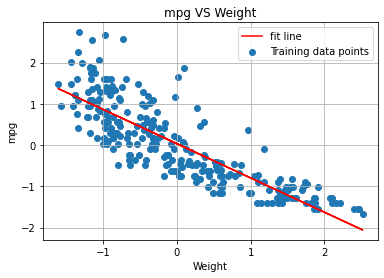

In [330]:
# Plotting the best fit regression lines versus data points:
plt.scatter(x_train, y_train, label='Training data points')
plt.plot(x_train,yhat, label='fit line', color='r')

plt.xlabel('Weight')
plt.ylabel('mpg')
plt.title('mpg VS Weight')
plt.legend()
plt.grid()
plt.show()

In [331]:
# Calculating goodness of fit of the line:
ybar = np.mean(y_train)
SStot = np.sum((y_train-ybar)**2)
SSres = np.sum((y_train-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.7019184063932036
